In [1]:
from quests_data import *

from ase.io import read
from quests.tools.plotting import savefig, COLORS

from scipy import stats
from scipy.optimize import curve_fit

ROOT_DIR = "../data/05-Ta"

## Analyzing the distribution of $\delta \mathcal{H}$ values

In [2]:
with open(f"{ROOT_DIR}/dH-full.json", "r") as f:
    data = json.load(f)
dH = np.array(data["delta_entropy"])

In [3]:
dH.min(), dH.max()

(-6.567171880459717, 55.7785716230479)

In [4]:
bins = np.arange(-7, 56)
norm = plt.Normalize(-1, 3)
colors = cm.coolwarm(norm(bins))

/var/folders/pk/bysbkx9j3993c_vqdsykcn680000gn/T/ipykernel_9163/898039240.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tax.set_yticklabels(tax.get_yticklabels(), color=COLORS["hcp"])
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substit

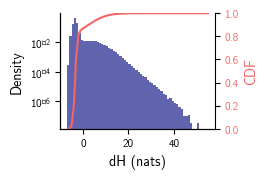

In [5]:
fig, ax = plt.subplots(figsize=(2.0, 1.5))

h, b, _ = ax.hist(dH, bins=bins, density=True, color=COLORS["bcc"])

tax = ax.twinx()

dx = bins[1] - bins[0]
F1 = np.cumsum(h) * dx
tax.plot(bins[1:], F1, "-", color=COLORS["hcp"])
tax.set_ylim(0, 1)

ax.set_ylabel("Density")
ax.set_xlabel("dH (nats)")
ax.set_yscale("log")
ax.spines["right"].set_visible(True)

tax.set_ylabel("CDF", color=COLORS["hcp"])
tax.set_yticklabels(tax.get_yticklabels(), color=COLORS["hcp"])

# savefig(fig, "06-Ta-hist.pdf")
plt.show()

## Timings for approximate $\delta \mathcal{H}$ calculation

In [6]:
time = pd.read_csv(f"{ROOT_DIR}/timings.csv")

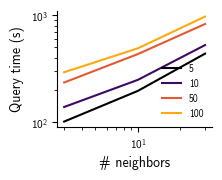

In [7]:
fig, ax = plt.subplots(figsize=(2.0, 1.5))

norm = plt.Normalize(np.log(5), np.log(200))
cmap = lambda x: cm.inferno(norm(x))

for nbrs, grp in time.groupby("nbrs"):
    ax.plot(grp["n_query"], grp["query_time"], color=cmap(np.log(nbrs)), label=nbrs)

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlabel("# neighbors")
ax.set_ylabel("Query time (s)")

ax.legend(frameon=False, markerscale=0.5, fontsize="x-small")

# savefig(fig, "06-tantalum-timing.pdf")
plt.show()

## Errors

In [8]:
true = pd.read_csv(f"{ROOT_DIR}/forces-true.csv")
pred = pd.read_csv(f"{ROOT_DIR}/forces-snap.csv")

In [9]:
err = np.linalg.norm(true.values - pred.values, axis=1)
true_norm = np.linalg.norm(true.values, axis=1)
pred_norm = np.linalg.norm(pred.values, axis=1)

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

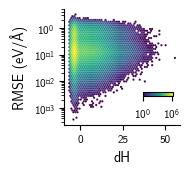

In [10]:
fig, ax = plt.subplots(figsize=(1.5, 1.5))

mask = dH < 500
hb = ax.hexbin(
    dH[mask], err[mask],
    gridsize=51,
    mincnt=1,
    yscale="log",
    bins="log",
    linewidths=(0, )
)

cax = fig.add_axes([0.65, 0.3, 0.2, 0.03])
cbar = fig.colorbar(hb, cax=cax, orientation='horizontal')
cbar.set_ticks([1e0, 1e6])

ax.set_xlabel("dH")
ax.set_ylabel("RMSE (eV/Å)")

# savefig(fig, "06-Ta-forces.pdf")
plt.show()

## Correlation between approximate and actual entropy

In [11]:
with open(f"{ROOT_DIR}/dH-approx.json", "r") as f:
    approx = json.load(f)
approx = np.array(approx["delta_entropy"])

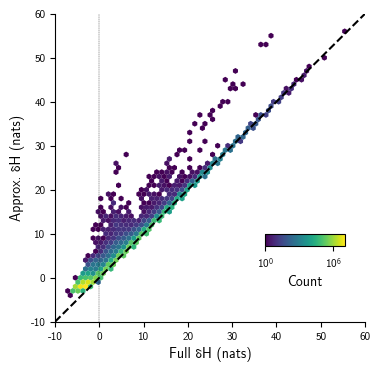

In [12]:
fig, ax = plt.subplots(figsize=(4, 4))

xmin, xmax = -10, 60
hb = ax.hexbin(
    dH, approx,
    gridsize=61,
    mincnt=1,
    bins="log",
    linewidths=(0, ),
    extent=(xmin, xmax, xmin, xmax)
)

ax.plot([xmin, xmax], [xmin, xmax], "k--")
ax.plot([0, 0], [xmin, xmax], "k--", linewidth=0.25)

cax = fig.add_axes([0.65, 0.3, 0.2, 0.03])
cbar = fig.colorbar(hb, cax=cax, orientation='horizontal')
cbar.set_ticks([1e0, 1e6])
cbar.set_label("Count")

ax.set_xlim(xmin, xmax)
ax.set_ylim(xmin, xmax)
ax.set_xlabel("Full δH (nats)")
ax.set_ylabel("Approx. δH (nats)")

# savefig(fig, "06-Ta-dH-approx.pdf")
plt.show()